In [1]:
import pandas as pd
import os
import ast
# df = pd.read_csv("data/types/sample_N50_d2_B5_G5_Utils1.csv")
N = 5
d = 2
B = 3
G = 5
types = False
data_folder = 'data'
real_world = ''
def create_filename(N, d, B, G, types=False, real_world=''):
    return os.path.join(data_folder, f"types/data_N{N}_d{d}_B{B}_G{G}{real_world}.csv") if types else os.path.join(data_folder, f"data_N{N}_d{d}_B{B}_G{G}.csv")
filename = create_filename(N, d, B, G, types=types, real_world=real_world)
df = pd.read_csv(filename)

In [2]:
column_mapping = {
    "solveStaticNoPool": "Non-Pooled",
    "solveStaticNonOverlap": "Non-Overlapping",
    "solveStaticOverlap": "Overlapping",
    "solveConicGibbsGreedyDynamic": "Greedy Dynamic",
    "solveNN": "SL Dynamic",
    "solveDynamic": "Optimal Dynamic",
    "solveGreedy": "Greedy Non-Overlapping"
}

# Filter the DataFrame to keep only these columns
df = df[list(column_mapping.keys())]

# Rename the columns
df.rename(columns=column_mapping, inplace=True)

In [3]:
averages = df.mean(numeric_only=True)

# Print the averages
print(averages)

Non-Pooled                1.095220
Non-Overlapping           1.125750
Overlapping               1.136050
Greedy Dynamic            1.130451
SL Dynamic                0.810338
Optimal Dynamic           1.152341
Greedy Non-Overlapping    1.027278
dtype: float64


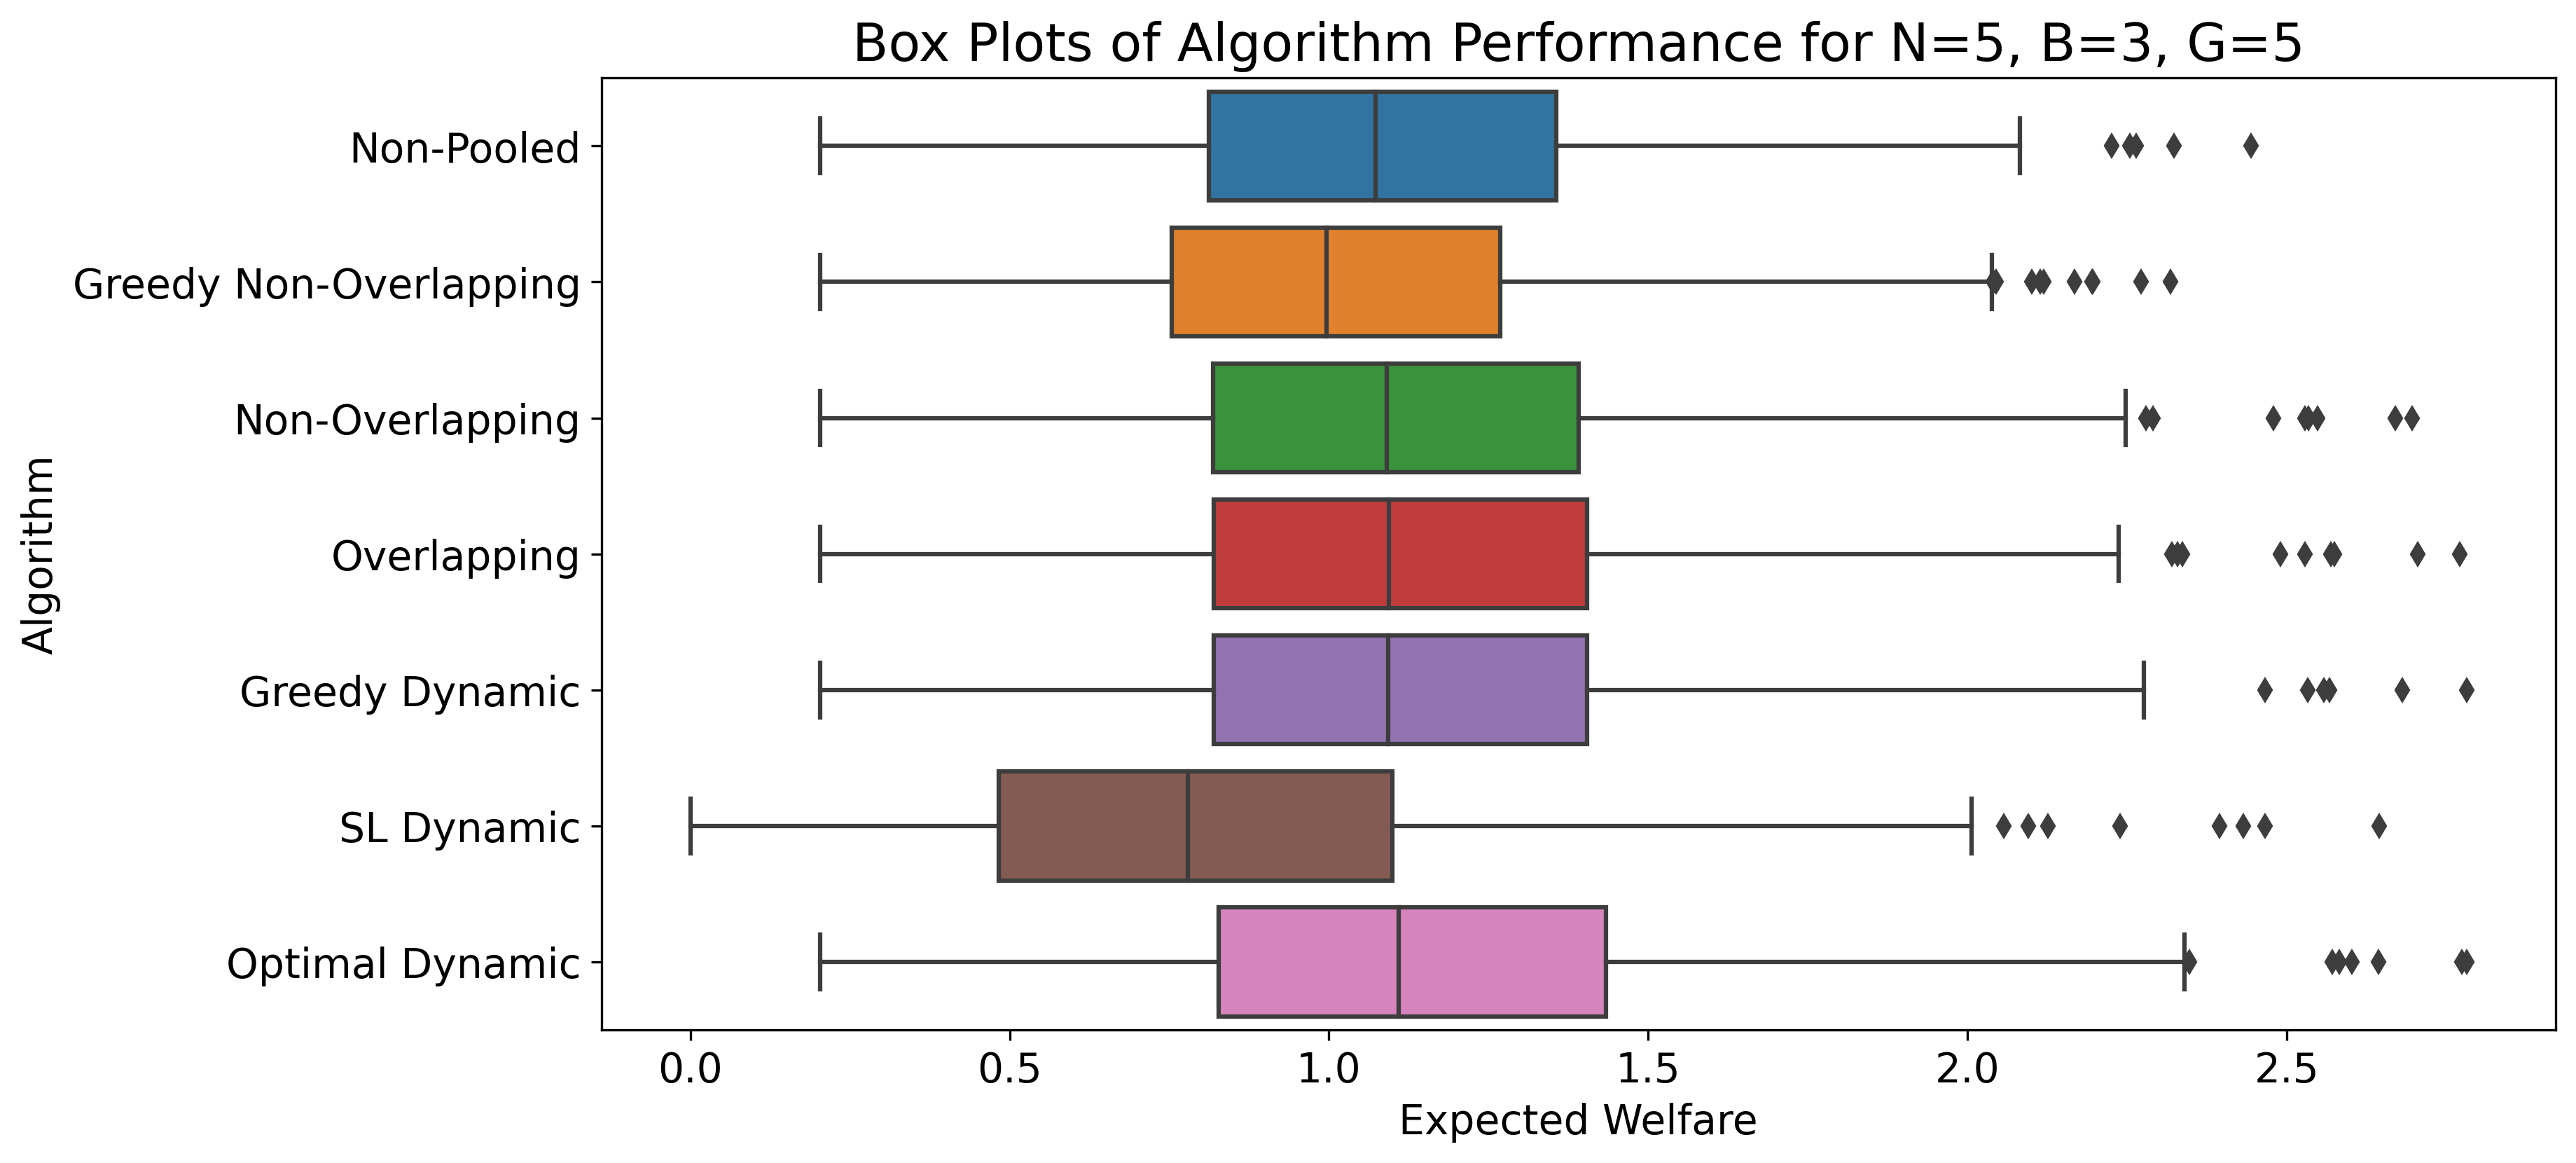

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set high-resolution output
plt.rcParams['figure.dpi'] = 300

# Select numeric columns
chosen_cols = boxplot_order = [
    "Non-Pooled",
    "Greedy Non-Overlapping",
    "Non-Overlapping",
    "Overlapping",
    "Greedy Dynamic",
    "SL Dynamic",
    "Optimal Dynamic"
]

# Create a horizontal box plot for all numeric columns
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[chosen_cols], orient='h')

# Set title and labels with specified font sizes
plt.title(f"Box Plots of Algorithm Performance for N={N}, B={B}, G={G}", fontsize=18)
plt.xlabel("Expected Welfare", fontsize=14)
plt.ylabel("Algorithm", fontsize=14)


# Adjust tick label font sizes
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Show plot
plt.show()

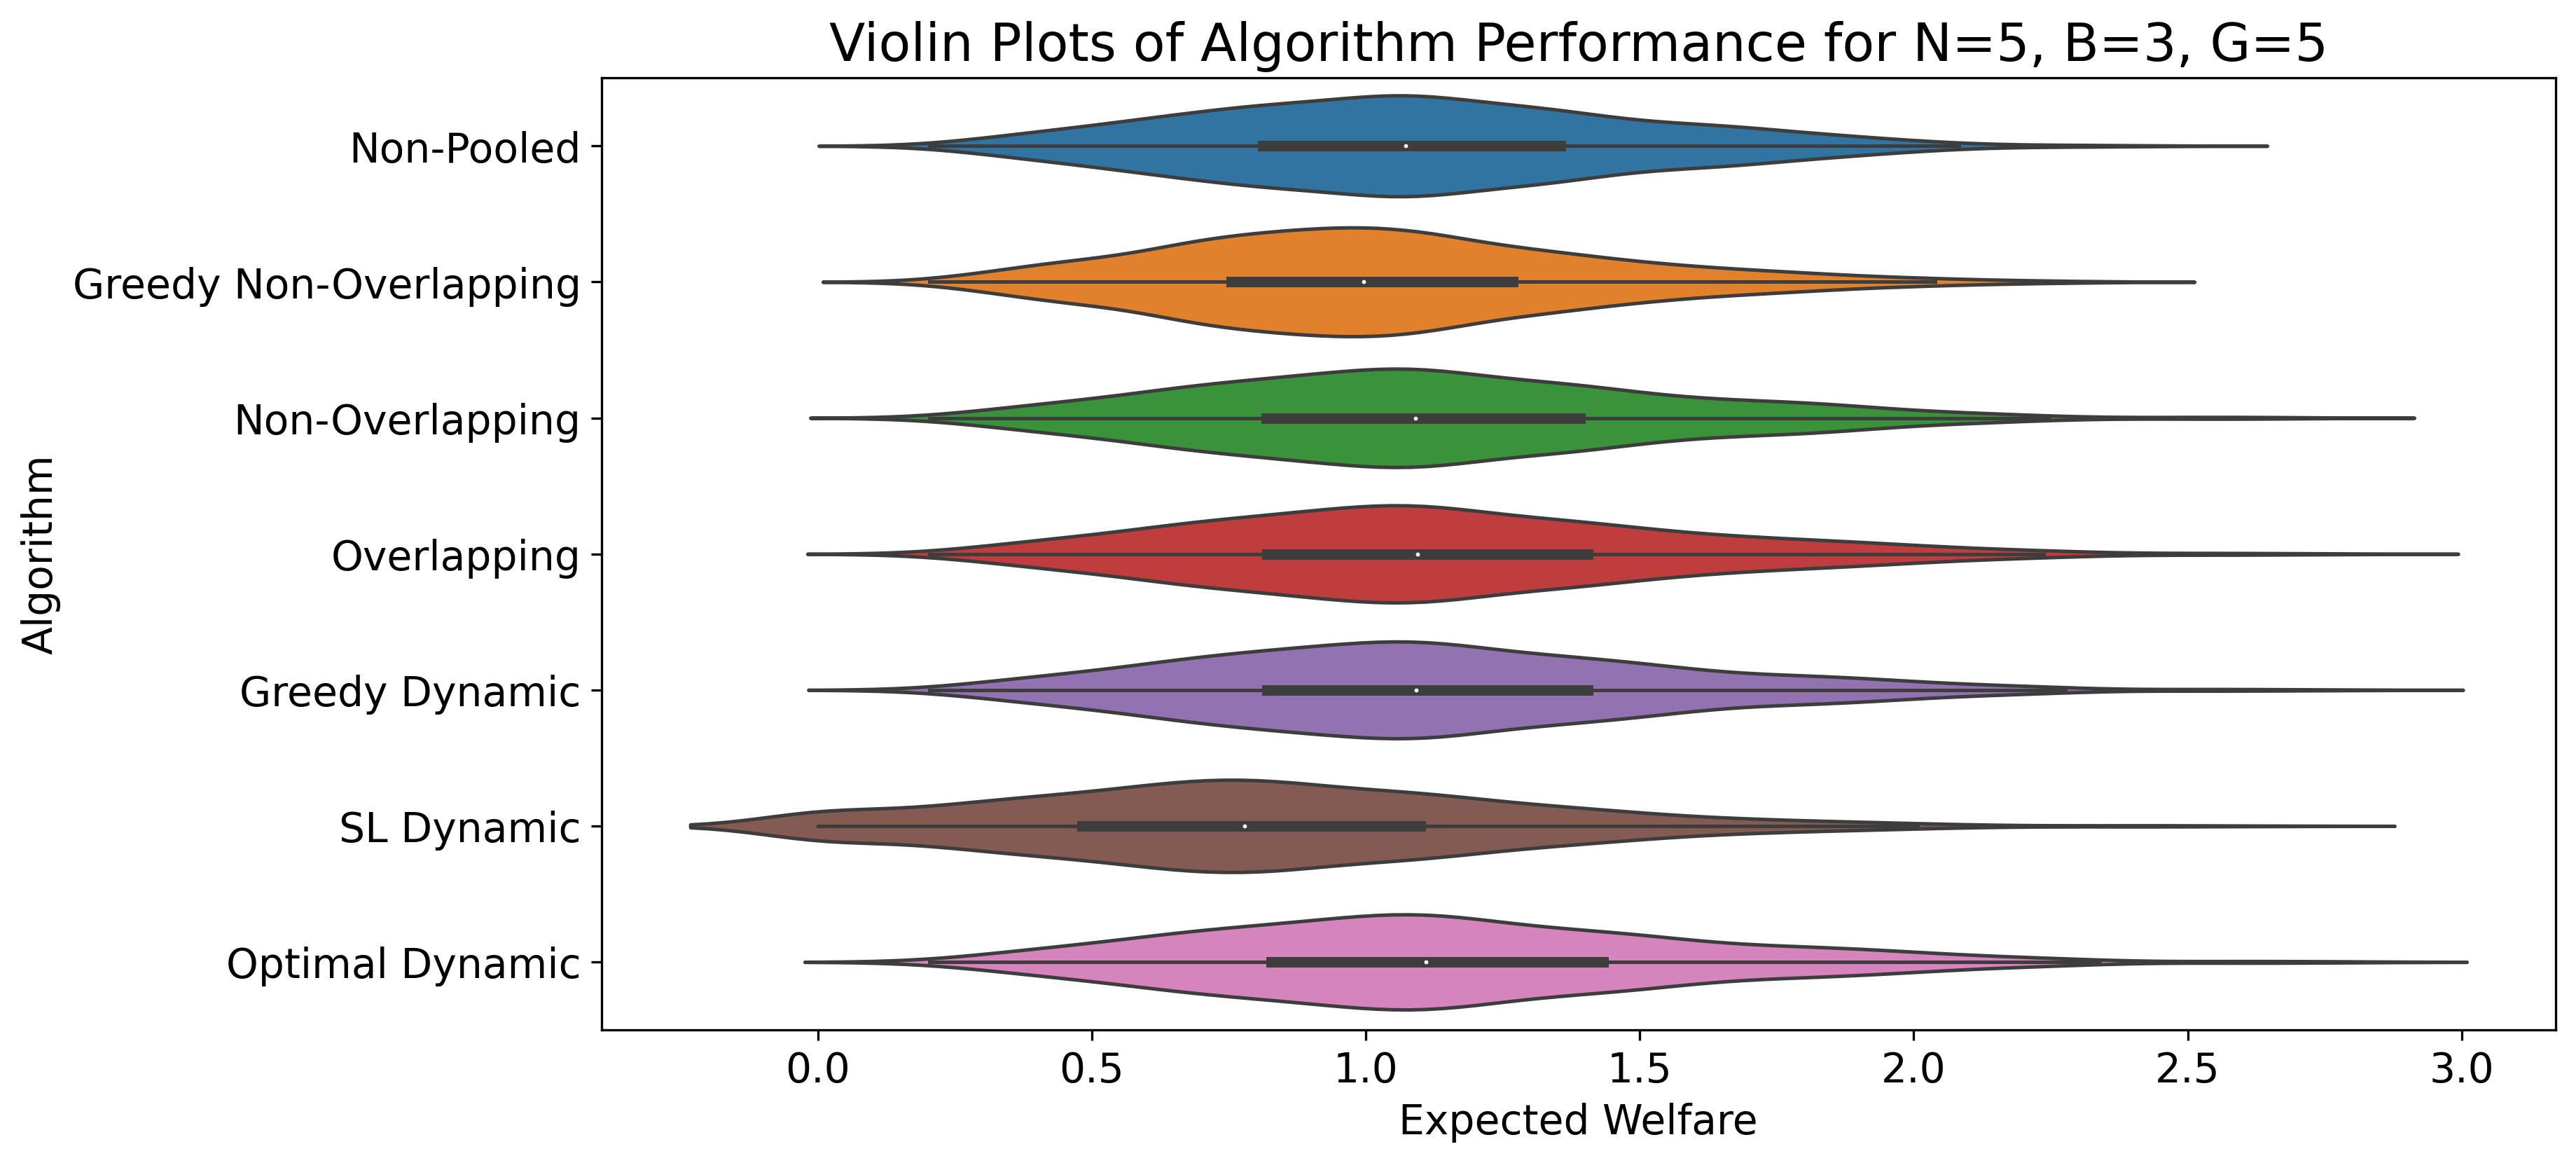

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set high-resolution output
plt.rcParams['figure.dpi'] = 300

# Select numeric columns
chosen_cols = [
    "Non-Pooled",
    "Greedy Non-Overlapping",
    "Non-Overlapping",
    "Overlapping",
    "Greedy Dynamic",
    "SL Dynamic",
    "Optimal Dynamic"
]

# Create a horizontal violin plot for all numeric columns
plt.figure(figsize=(12, 6))
sns.violinplot(data=df[chosen_cols], orient='h', inner="box", linewidth=1.2)

# Set title and labels with specified font sizes
plt.title(f"Violin Plots of Algorithm Performance for N={N}, B={B}, G={G}", fontsize=18)
plt.xlabel("Expected Welfare", fontsize=14)
plt.ylabel("Algorithm", fontsize=14)

# Adjust tick label font sizes
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Show plot
plt.show()


In [6]:

rl_col = 'Non-Pooled'
exclude_cols = {rl_col, 'agents'}
other_columns = [col for col in df.columns if col not in exclude_cols]

# Calculate the percentage for each column
percentages = {
    col: (df[rl_col].round(6) > df[col].round(6)).sum() / len(df) * 100
    for col in other_columns
}

# Display the results
for col, percentage in percentages.items():
    print(f"{rl_col} > {col}: {percentage:.2f}% of rows")

Non-Pooled > Non-Overlapping: 0.00% of rows
Non-Pooled > Overlapping: 0.00% of rows
Non-Pooled > Greedy Dynamic: 19.40% of rows
Non-Pooled > SL Dynamic: 96.20% of rows
Non-Pooled > Optimal Dynamic: 0.00% of rows
Non-Pooled > Greedy Non-Overlapping: 52.30% of rows


In [95]:
# Define the columns to keep
columns_to_keep = [
    "Overlapping",
    "Greedy Dynamic",
    "SL Dynamic",
    "Optimal Dynamic"
]

In [96]:
# Define the algorithms to compare (excluding 'agents' if present)
algorithms = [col for col in columns_to_keep]
df_rounded = df[columns_to_keep]

# Round all numeric values to 6 decimal places before comparison
df_rounded = df.round(6)

# Compute the percentage of times each algorithm is greater than another
comparison_matrix = {
    alg1: {
        alg2: (df_rounded[alg1] > df_rounded[alg2]).sum() / len(df_rounded) * 100 if alg1 != alg2 else None
        for alg2 in algorithms
    }
    for alg1 in algorithms
}

# Generate LaTeX table
latex_code = """
\\begin{table}[ht]
    \\centering
    \\begin{tabular}{l""" + " r" * len(algorithms) + """}
        \\toprule
        & """ + " & ".join([f"\\textbf{{{alg}}}" for alg in algorithms]) + """ \\\\
        \\midrule
"""

# Fill in the rows
for alg1 in algorithms:
    row = f"        \\textbf{{{alg1}}} "
    for alg2 in algorithms:
        if alg1 == alg2:
            row += " & --"  # Dash for diagonal
        else:
            row += f" & {comparison_matrix[alg1][alg2]:.2f}"
    row += " \\\\\n"
    latex_code += row

# Close LaTeX table
latex_code += """        \\bottomrule
    \\end{tabular}
    \\caption{Percentage of times each algorithm outperforms another}
    \\label{tab:comparison}
\\end{table}
"""

# Print the generated LaTeX code
print(latex_code)



\begin{table}[ht]
    \centering
    \begin{tabular}{l r r r r}
        \toprule
        & \textbf{Overlapping} & \textbf{Greedy Dynamic} & \textbf{SL Dynamic} & \textbf{Optimal Dynamic} \\
        \midrule
        \textbf{Overlapping}  & -- & 20.20 & 40.20 & 0.00 \\
        \textbf{Greedy Dynamic}  & 13.70 & -- & 37.40 & 0.00 \\
        \textbf{SL Dynamic}  & 13.30 & 16.60 & -- & 0.00 \\
        \textbf{Optimal Dynamic}  & 23.10 & 29.40 & 41.10 & -- \\
        \bottomrule
    \end{tabular}
    \caption{Percentage of times each algorithm outperforms another}
    \label{tab:comparison}
\end{table}



In [176]:
# Expand display options to avoid truncation
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', None)     # Show all rows if needed
pd.set_option('display.width', 1000)        # Set a wide enough display width
pd.set_option('display.max_colwidth', None) # Ensure full content in each cell

In [189]:
# Define a function to find the row with the maximum ratio between two columns
def find_max_min_ratio(df, col1, col2):
    # Calculate the ratio
    df['ratio'] = df[col1] / df[col2]
    
    # Find the index of the row with the maximum ratio
    max_ratio_idx = df['ratio'].idxmax()
    
    # Find the index of the row with the minimum ratio
    min_ratio_idx = df['ratio'].idxmin()
    
    # Print the entire row with the maximum ratio
    print("Row with Maximum Ratio:")
    print(df.loc[max_ratio_idx])
    print("\n")
    
    # Print the entire row with the minimum ratio
    print("Row with Minimum Ratio:")
    print(df.loc[min_ratio_idx])

# Replace 'Column1' and 'Column2' with the actual column headers you want to use
find_max_min_ratio(df, 'Non-Pooled', 'Greedy Non-Overlapping')

Row with Maximum Ratio:
Non-Pooled                0.741820
Non-Overlapping           0.741820
Overlapping               0.741820
Greedy Dynamic            0.569008
SL Dynamic                0.741820
Optimal Dynamic           0.741820
Greedy Non-Overlapping    0.397752
ratio                     1.865031
Name: 602, dtype: float64


Row with Minimum Ratio:
Non-Pooled                1.272717
Non-Overlapping           1.662593
Overlapping               1.671324
Greedy Dynamic            1.671324
SL Dynamic                1.588594
Optimal Dynamic           1.671324
Greedy Non-Overlapping    1.662593
ratio                     0.765501
Name: 12, dtype: float64


In [184]:
import matplotlib.pyplot as plt
import ast

def plot_avg_utility_vs_health(df, x_func, y_func, 
                               x_fontsize=16, y_fontsize=16, 
                               title_fontsize=18, legend_fontsize=14, 
                               figsize=(8, 5),
                               xlabel="Average Population Utility", ylabel="Average Population Health", 
                               legend_x=None, legend_y=None, legend_equal=None, title=None):
    """
    Plots average utility vs. average health for each row in the DataFrame.
    The color of each point is determined by whether x_func or y_func has a higher value for that row.

    Parameters:
    df (pd.DataFrame): DataFrame containing the 'agents' column.
    x_func (str): Column name for comparison.
    y_func (str): Column name for comparison.
    x_fontsize (int): Font size for x-axis label.
    y_fontsize (int): Font size for y-axis label.
    title_fontsize (int): Font size for title.
    legend_fontsize (int): Font size for legend.
    figsize (tuple): Figure size (width, height).
    xlabel (str): Label for the x-axis (default: "Average Utility").
    ylabel (str): Label for the y-axis (default: "Average Health").
    legend_x (str): Custom legend label for when x_func is higher (default: `x_func higher`).
    legend_y (str): Custom legend label for when y_func is higher (default: `y_func higher`).
    legend_equal (str): Custom legend label for when values are equal (default: `Equal`).
    title (str): Custom plot title (default: "{x_func} vs {y_func}").
    """
    # Parse the 'agents' column to extract (utility, health)
    avg_utility = []
    avg_health = []
    df = df.round(6)
    
    for row in df['agents']:
        try:
            # Convert string representation of list into an actual Python list
            agents_list = ast.literal_eval(row)
            # Compute averages
            utilities = [agent[1] for agent in agents_list]
            health_values = [agent[2] for agent in agents_list]
            avg_utility.append(sum(utilities) / len(utilities))
            avg_health.append(sum(health_values) / len(health_values))
        except Exception as e:
            print(f"Error parsing row: {row}, {e}")
            avg_utility.append(None)
            avg_health.append(None)

    # Add computed averages to DataFrame
    df['avg_utility'] = avg_utility
    df['avg_health'] = avg_health

    # Drop rows with missing values
    df_filtered = df.dropna(subset=['avg_utility', 'avg_health', x_func, y_func])

    if df_filtered.empty:
        print("No data available after filtering for non-null values.")
        return
    
    # Define colors and alphas based on which function has the higher value
    colors = []
    alphas = []
    
    for _, row in df_filtered.iterrows():
        if row[x_func] > row[y_func]:
            colors.append('blue')
            alphas.append(0.7)
        elif row[x_func] < row[y_func]:
            colors.append('red')
            alphas.append(0.7)
        else:  # Equal case
            colors.append('#E0E0E0')  # Lighter gray
            alphas.append(0.4)  # More transparent gray
    
    # Create scatter plot
    plt.figure(figsize=figsize)

    # Plot each point with its respective alpha
    for i in range(len(df_filtered)):
        plt.scatter(df_filtered['avg_utility'].iloc[i], df_filtered['avg_health'].iloc[i], 
                    c=colors[i], alpha=alphas[i], edgecolors='black')

    # Set labels with specified font sizes
    plt.xlabel(xlabel, fontsize=x_fontsize)
    plt.ylabel(ylabel, fontsize=y_fontsize)
    
    # Set title (default or user-provided)
    plot_title = title if title else f"{x_func} vs. {y_func} Performance"
    plt.title(plot_title, fontsize=title_fontsize)
    
    # Set legend labels (default or user-provided)
    legend_x_label = legend_x if legend_x else f"{x_func} Outperforms"
    legend_y_label = legend_y if legend_y else f"{y_func} Outperforms"
    legend_equal_label = legend_equal if legend_equal else "Equal"

    # Add a legend manually with appropriate alpha values
    plt.scatter([], [], color='blue', alpha=0.7, edgecolors='black', label=legend_x_label)
    plt.scatter([], [], color='red', alpha=0.7, edgecolors='black', label=legend_y_label)
    plt.scatter([], [], color='#E0E0E0', alpha=0.4, edgecolors='black', label=legend_equal_label)  # Lighter gray + transparency
    plt.legend(fontsize=legend_fontsize)

    # Show plot
    plt.show()

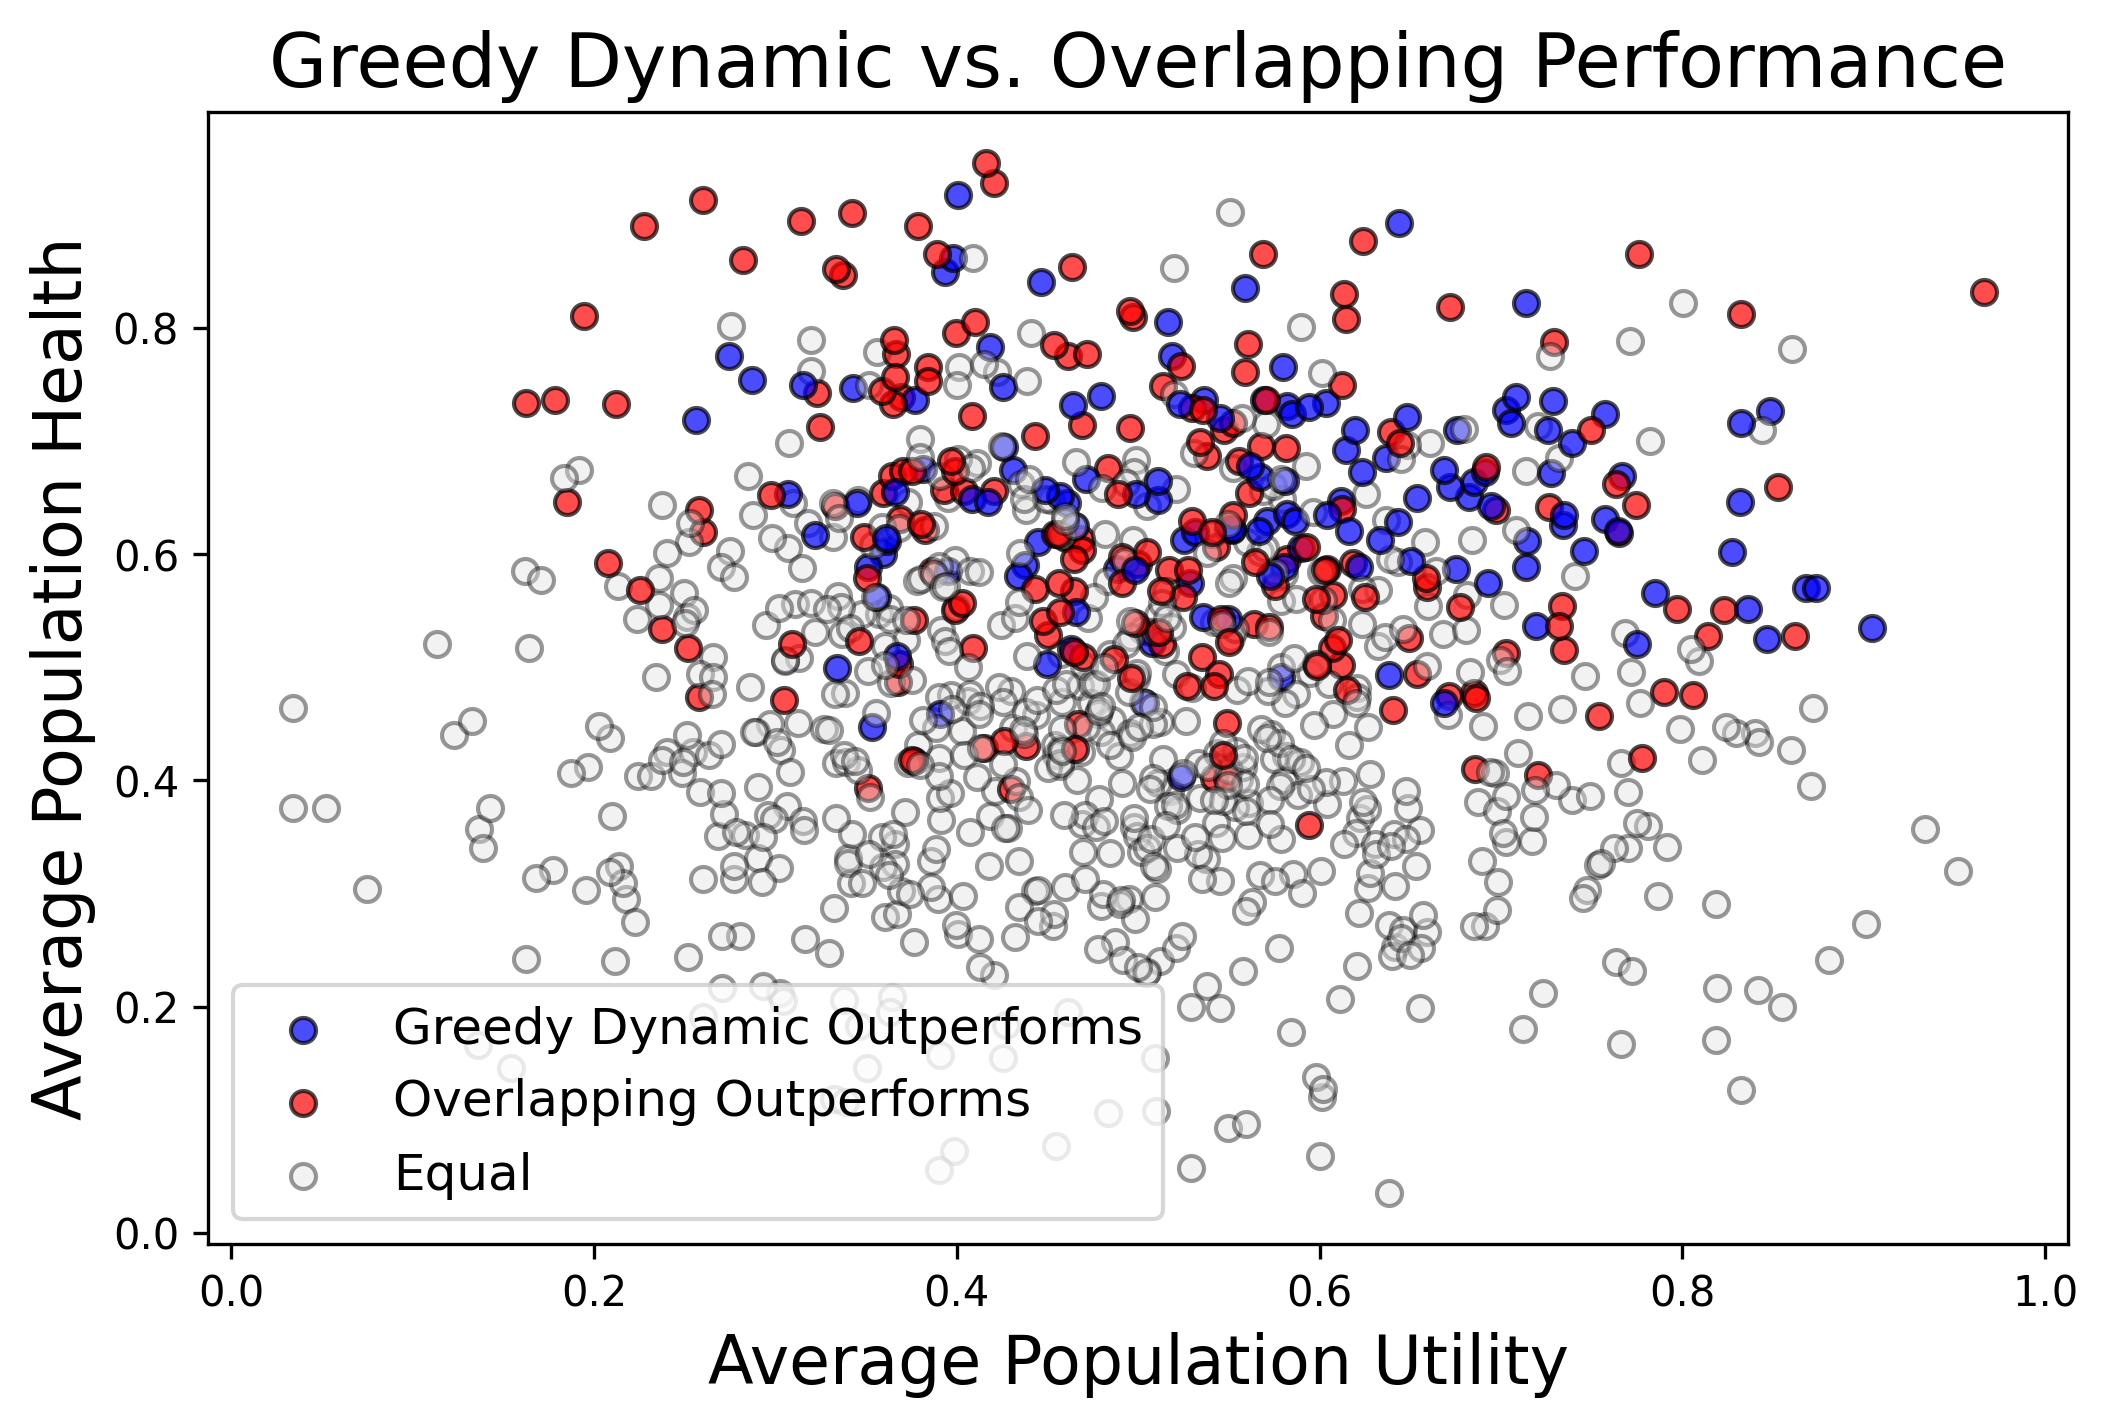

In [188]:
df = pd.read_csv(filename)
column_mapping = {
    "solveStaticNoPool": "Non-Pooled",
    "solveStaticNonOverlap": "Non-Overlapping",
    "solveStaticOverlap": "Overlapping",
    "solveConicGibbsGreedyDynamic": "Greedy Dynamic",
    "solveNN": "SL Dynamic",
    "solveDynamic": "Optimal Dynamic",
    "solveGreedy": "Greedy Non-Overlapping",
    "agents": "agents"
}

# Filter the DataFrame to keep only these columns
df = df[list(column_mapping.keys())]

# Rename the columns
df.rename(columns=column_mapping, inplace=True)
plot_avg_utility_vs_health(df, 'Greedy Dynamic', 'Overlapping', legend_fontsize=12)
df = pd.read_csv(filename)
column_mapping = {
    "solveStaticNoPool": "Non-Pooled",
    "solveStaticNonOverlap": "Non-Overlapping",
    "solveStaticOverlap": "Overlapping",
    "solveConicGibbsGreedyDynamic": "Greedy Dynamic",
    "solveNN": "SL Dynamic",
    "solveDynamic": "Optimal Dynamic",
    "solveGreedy": "Greedy Non-Overlapping"
}

# Filter the DataFrame to keep only these columns
df = df[list(column_mapping.keys())]

# Rename the columns
df.rename(columns=column_mapping, inplace=True)

In [7]:
from sklearn.linear_model import LinearRegression

In [ ]:
def plot_results_compare(x_func, y_func, combo, compare):
    N = combo['N']
    d = combo['d']
    B = combo['B']
    G = combo['G']

    # Create the filename based on the provided combination and functions
    filename = create_filename(N, d, B, G, types=types)

    # Load the DataFrame from the CSV file
    if os.path.exists(filename):
        print(f"Loading data from {filename}")
        df = pd.read_csv(filename)
    else:
        print(f"No data found for N={N}, d={d}, B={B}, G={G}. Please generate the data first.")
        return

    # Create a new column for color mapping based on the condition
    df['color'] = df[compare.__name__] > df[x_func.__name__]

    # Scatter plot with conditional coloring
    sns.scatterplot(x=df[x_func.__name__], y=df[y_func.__name__], hue=df['color'], palette={True: 'green', False: sns.color_palette()[0]}, legend=False)

    # Fit the linear regression model before plotting
    model = LinearRegression()
    model.fit(df[[x_func.__name__]], df[y_func.__name__])
    slope = model.coef_[0]
    intercept = model.intercept_

    # Plot the regression line and add the equation to the legend
    sns.regplot(x=df[x_func.__name__], y=df[y_func.__name__], scatter=False, color="red", label=f'Regression Line: y = {slope:.2f}x + {intercept:.2f}')

    # Add the black line y = x
    min_val = min(df[x_func.__name__].min(), df[y_func.__name__].min())
    max_val = max(df[x_func.__name__].max(), df[y_func.__name__].max())
    plt.plot([min_val, max_val], [min_val, max_val], color='black', linestyle='--', label='y = x')  # Dashed black line

    # Add a purple dot at the average of x and y values
    avg_x = df[x_func.__name__].mean()
    avg_y = df[y_func.__name__].mean()
    plt.scatter(avg_x, avg_y, color='purple', s=100, zorder=5, label=f'Average ({avg_x:.3f}, {avg_y:.3f})')

    # Add labels and title
    plt.xlabel(x_func.__name__)
    plt.ylabel(y_func.__name__)
    plt.title(f'{x_func.__name__} vs {y_func.__name__}\n with G = {G}, N = {N}, B = {B}, d = {d}\n Green points are where {compare.__name__} > {x_func.__name__}')

    # Add legend for the new elements
    plt.legend()

    # Save the plot with the desired filename format
    save_filename = f"figures/scatterplots/{x_func.__name__}_{y_func.__name__}_N{N}_B{B}.png"
    plt.savefig(save_filename, bbox_inches='tight')
    print(f"Saved plot as {save_filename}")

    # Show plot
    plt.show()

In [24]:
def plot_results(combo, 
    x_var=None, y_var=None, 
    x_title=None, y_title=None, 
    x_fontsize=None, y_fontsize=None, 
    title_fontsize=None, legend_fontsize=None, 
    figsize=None, df=None
):
    N = combo['N']
    d = combo['d']
    B = combo['B']
    G = combo['G']
    types = combo.get('types', False)
    real_world = combo.get('real_world', '')

    # Determine variable names for the DataFrame lookup

    # Determine axis titles
    x_title = x_title if x_title else x_var 
    y_title = y_title if y_title else y_var

    filename = create_filename(N, d, B, G, types=types, real_world=real_world)

    if df is not None:
        df_filtered = df
    else:

    # Load the DataFrame from the CSV file
        if os.path.exists(filename):
            print(f"Loading data from {filename}")
            df = pd.read_csv(filename)
        else:
            print(f"No data found for N={N}, d={d}, B={B}, G={G}. Please generate the data first.")
            return

        # Filter the DataFrame to only include rows where both columns have data
        df_filtered = df.dropna(subset=[x_var, y_var])

        # Check if there are enough data points after filtering
        if df_filtered.empty:
            print("No data available after filtering for non-null values in both columns.")
            return

    # Fit the linear regression model before plotting
    model = LinearRegression()
    model.fit(df_filtered[[x_var]], df_filtered[y_var])
    slope = model.coef_[0]
    intercept = model.intercept_

    # Set figure size if provided
    plt.figure(figsize=figsize) if figsize else plt.figure()

    # Scatter plot without the regression line initially
    sns.scatterplot(x=df_filtered[x_var], y=df_filtered[y_var])

    # Plot the regression line separately and pass the equation to the legend
    sns.regplot(x=df_filtered[x_var], y=df_filtered[y_var], scatter=False, color="red", 
                label=f'Regression Line: y = {slope:.2f}x + {intercept:.2f}')

    # Add the black dashed line y = x
    min_val = min(df_filtered[x_var].min(), df_filtered[y_var].min())
    max_val = max(df_filtered[x_var].max(), df_filtered[y_var].max())
    plt.plot([min_val, max_val], [min_val, max_val], color='black', linestyle='--', label='y = x')

    # Add a purple dot at the average of x and y values
    avg_x = df_filtered[x_var].mean()
    avg_y = df_filtered[y_var].mean()
    plt.scatter(avg_x, avg_y, color='purple', s=100, zorder=5, label=f'Average ({avg_x:.3f}, {avg_y:.3f})')

    # Add labels and title with optional font sizes
    plt.xlabel(x_title + " Plan Performance", fontsize=x_fontsize)
    plt.ylabel(y_title + " Plan Performance", fontsize=y_fontsize)
    
    extra_title = f' for {real_world.replace("_", " ")}' if real_world else ''
    # title = f'{x_title} vs {y_title}\n with G = {G}, N = {N}, B = {B}' + extra_title
    title = f'{x_title} vs. {y_title} Plan Performance' + extra_title
    plt.title(title, fontsize=title_fontsize)

    # Add legend with optional font size
    plt.legend(fontsize=legend_fontsize)

    # Save the plot with the desired filename format
    folder = 'figures/scatterplots/types/' if types else 'figures/scatterplots/'
    save_filename = f"{folder}{x_var}_{y_var}_N{N}_B{B}_G{G}{real_world}.png".replace(" ", "")
    plt.savefig(save_filename)
    print(f"Saved plot as {save_filename}")

    # Show plot
    plt.show()

Saved plot as figures/scatterplots/GreedyDynamic_Overlapping_N3_B2_G3.png


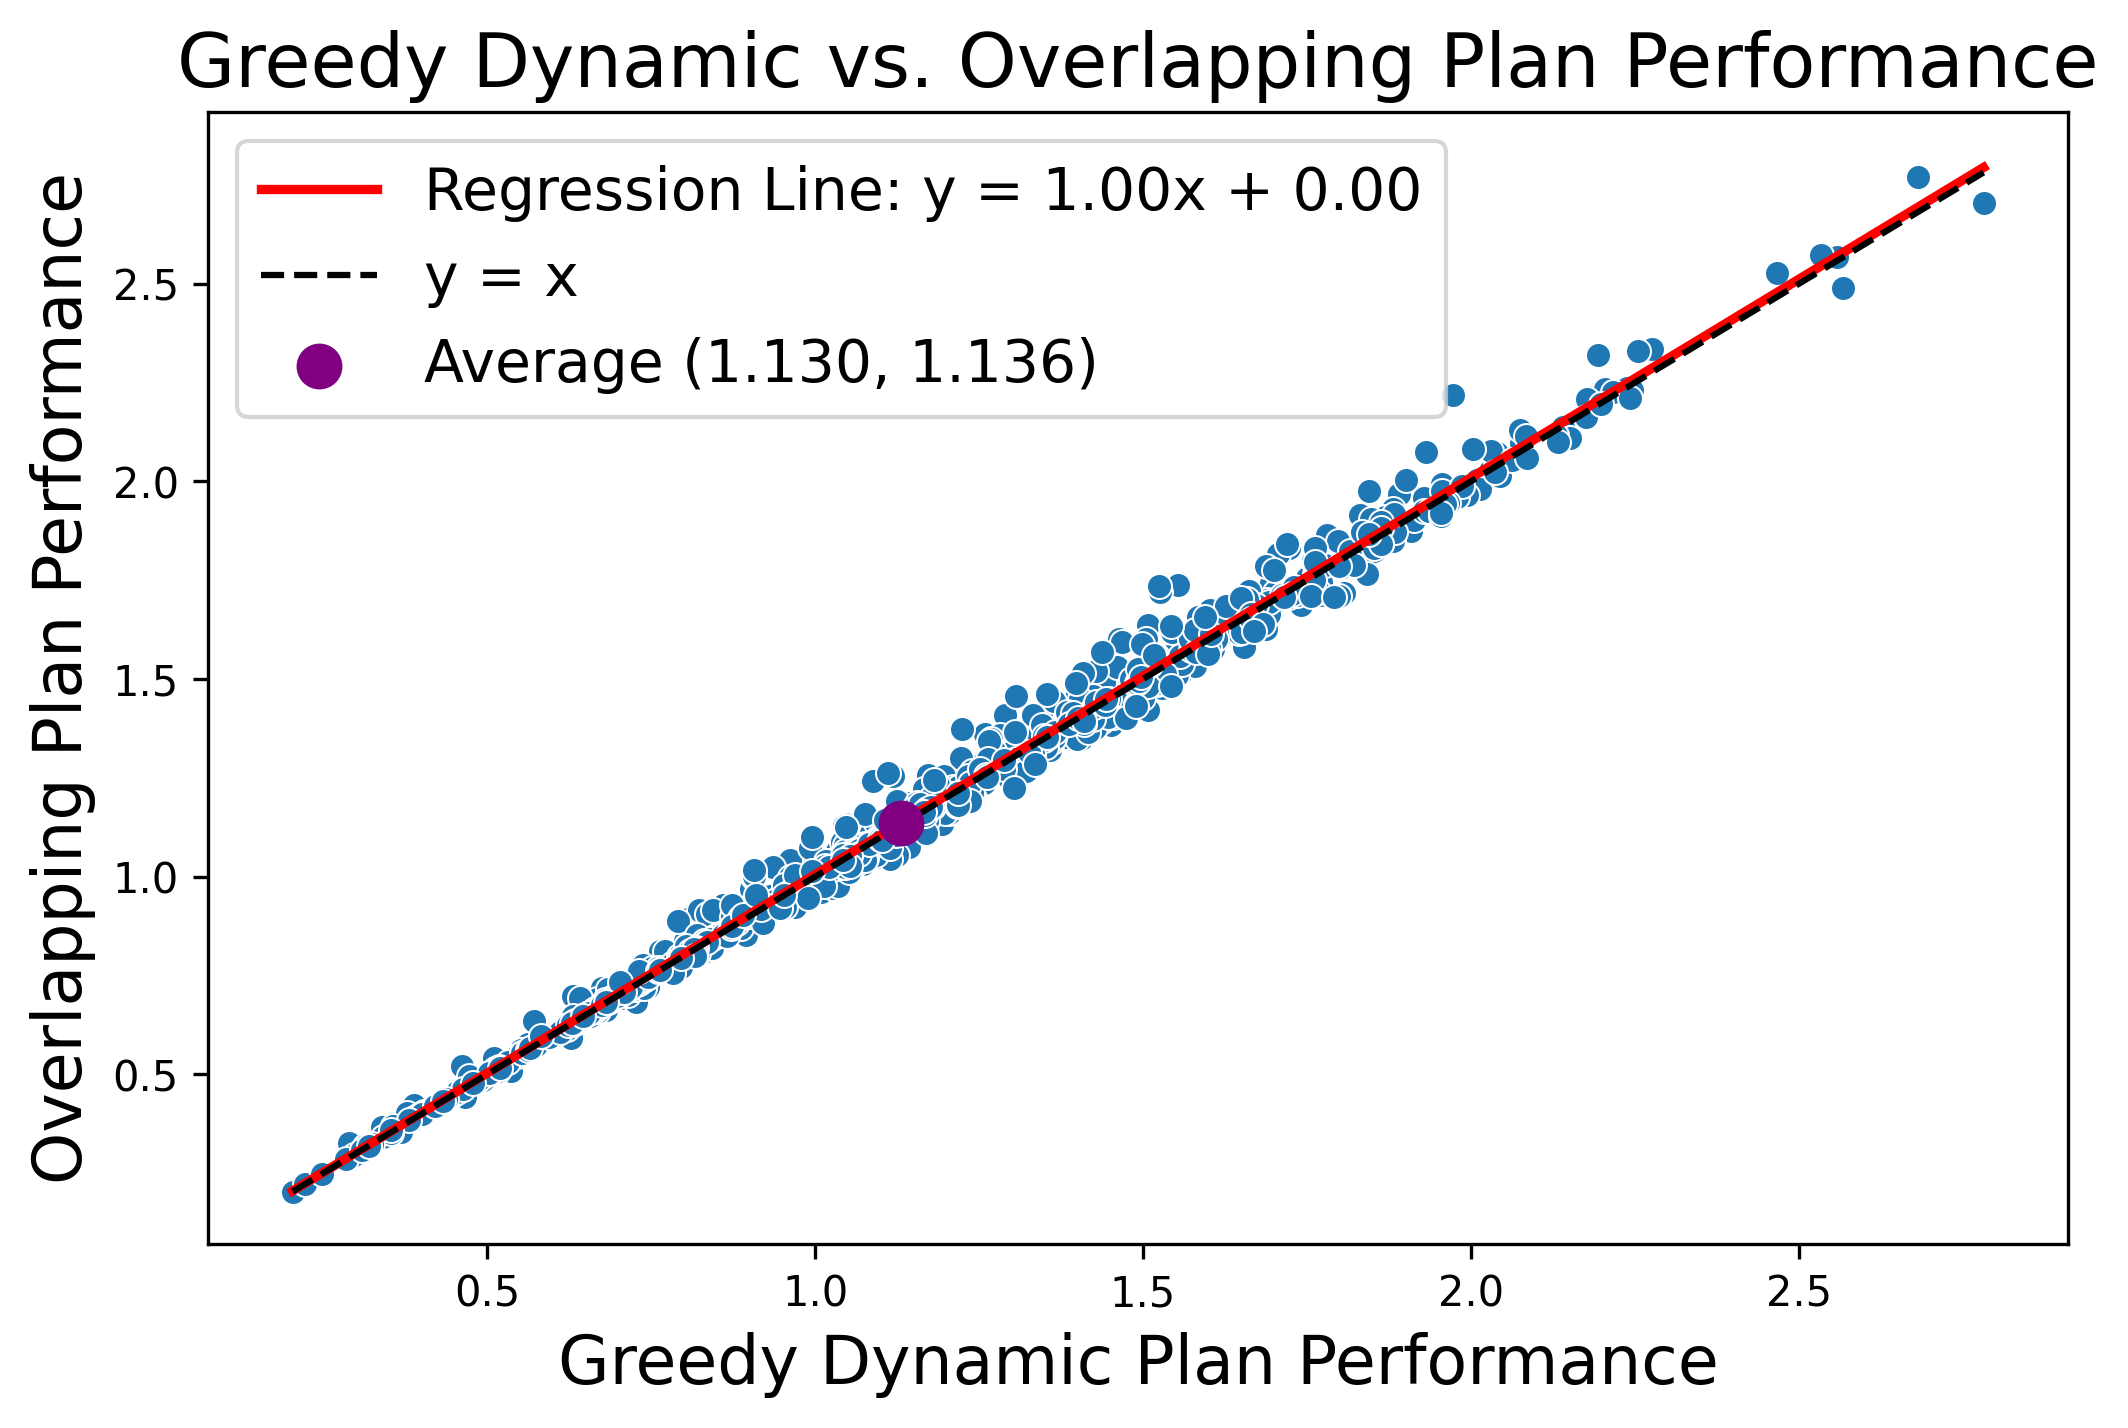

Saved plot as figures/scatterplots/OptimalDynamic_Overlapping_N3_B2_G3.png


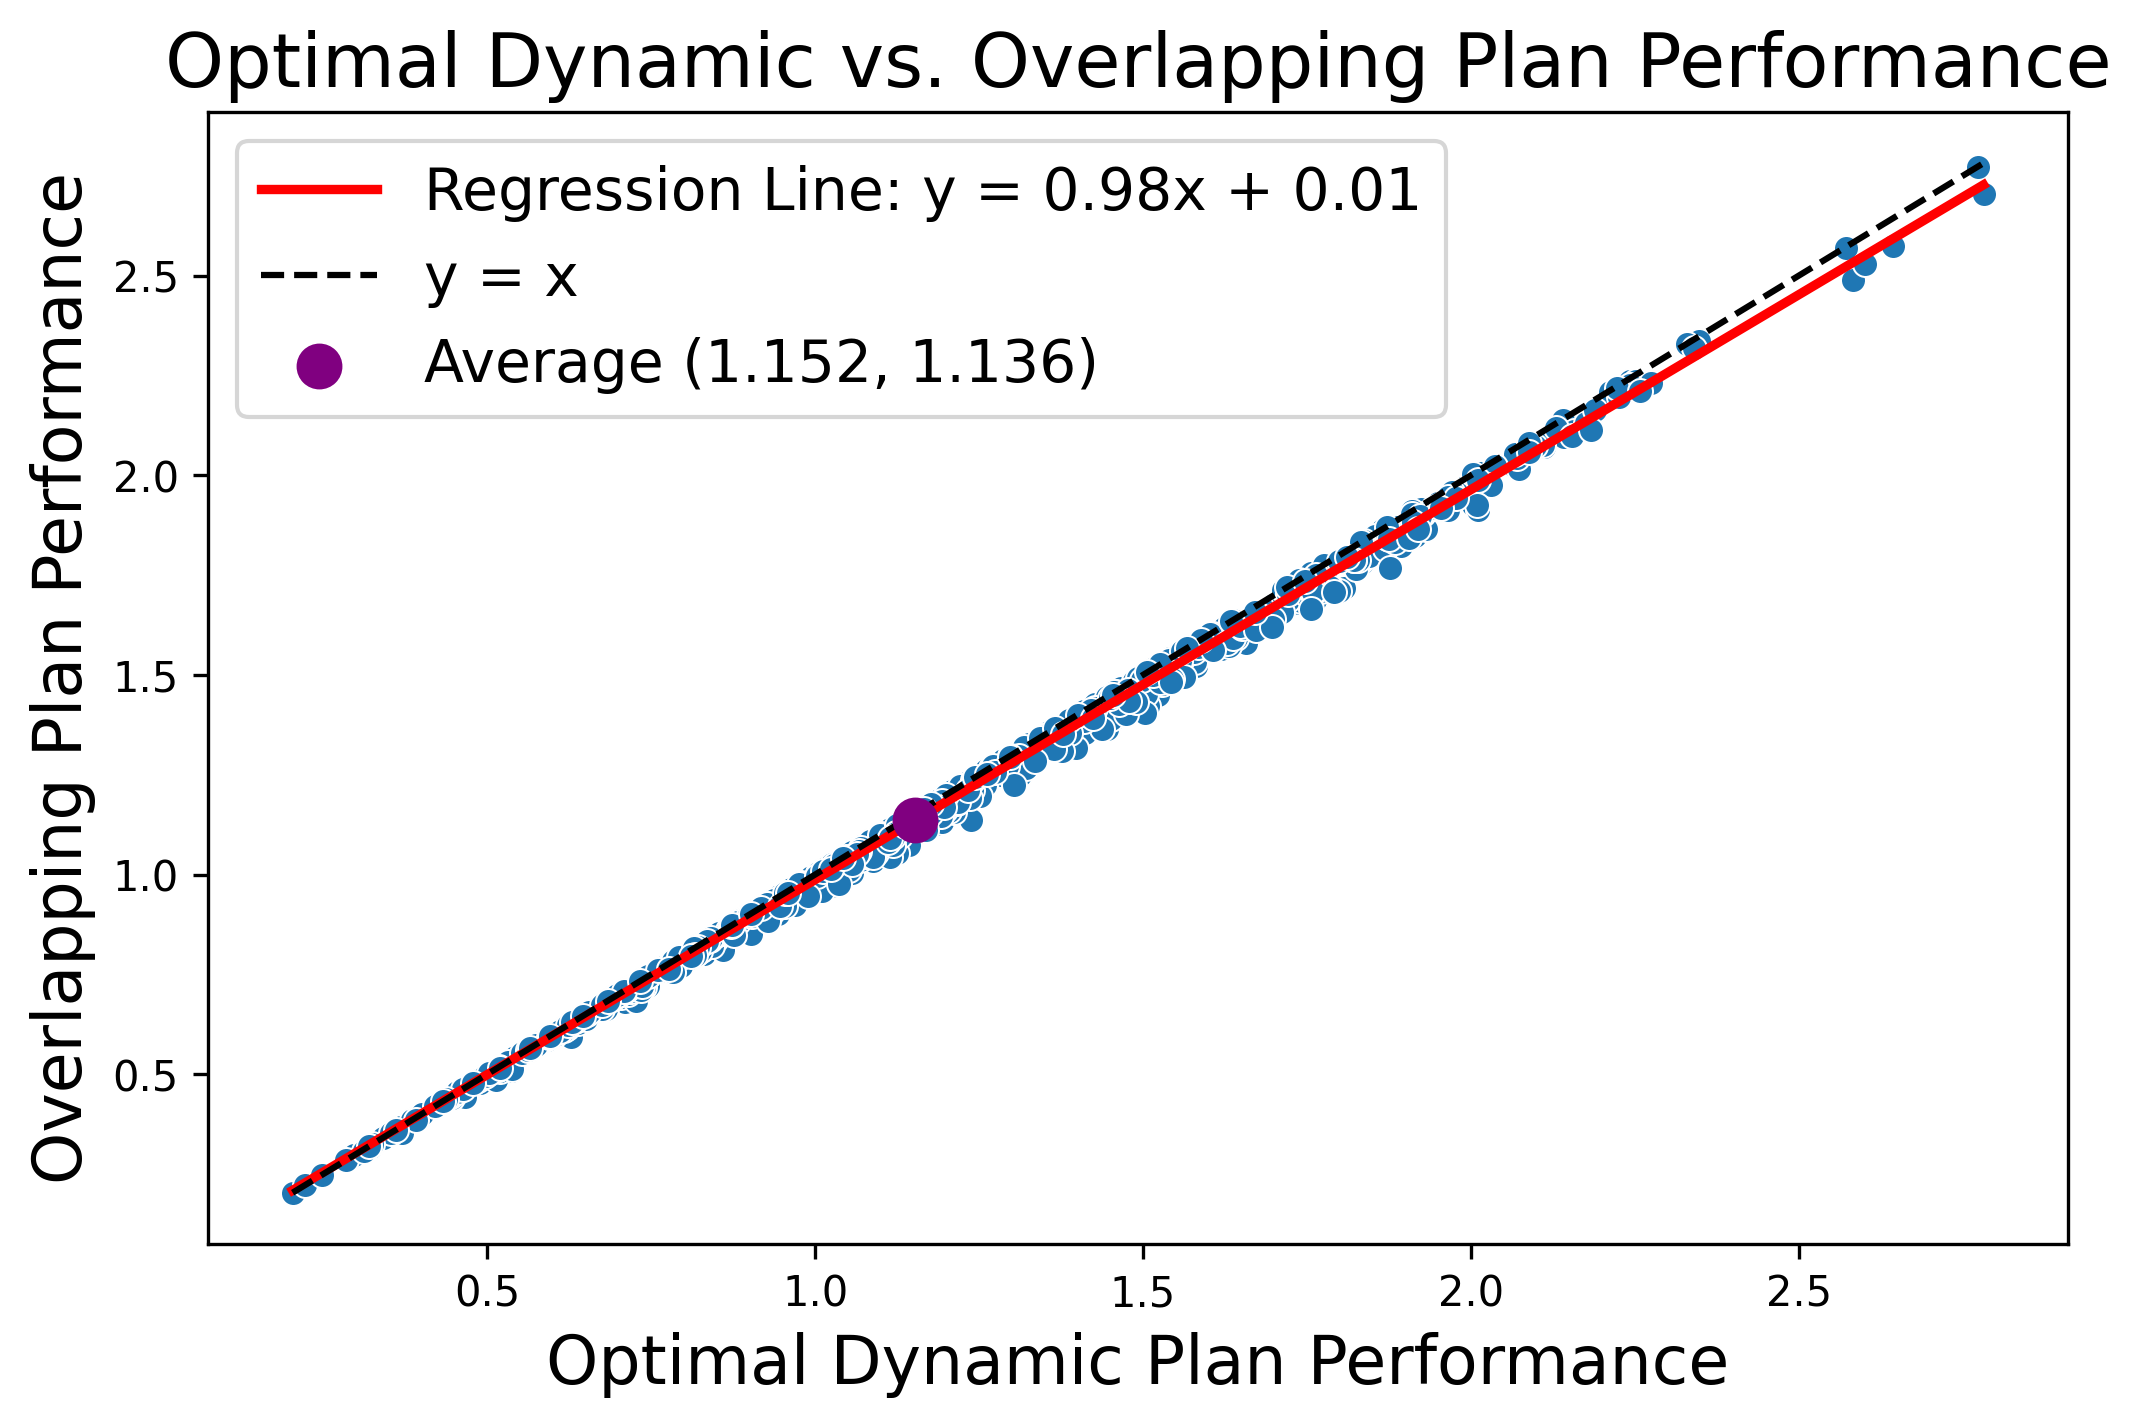

Saved plot as figures/scatterplots/GreedyDynamic_Overlapping_N5_B3_G5.png


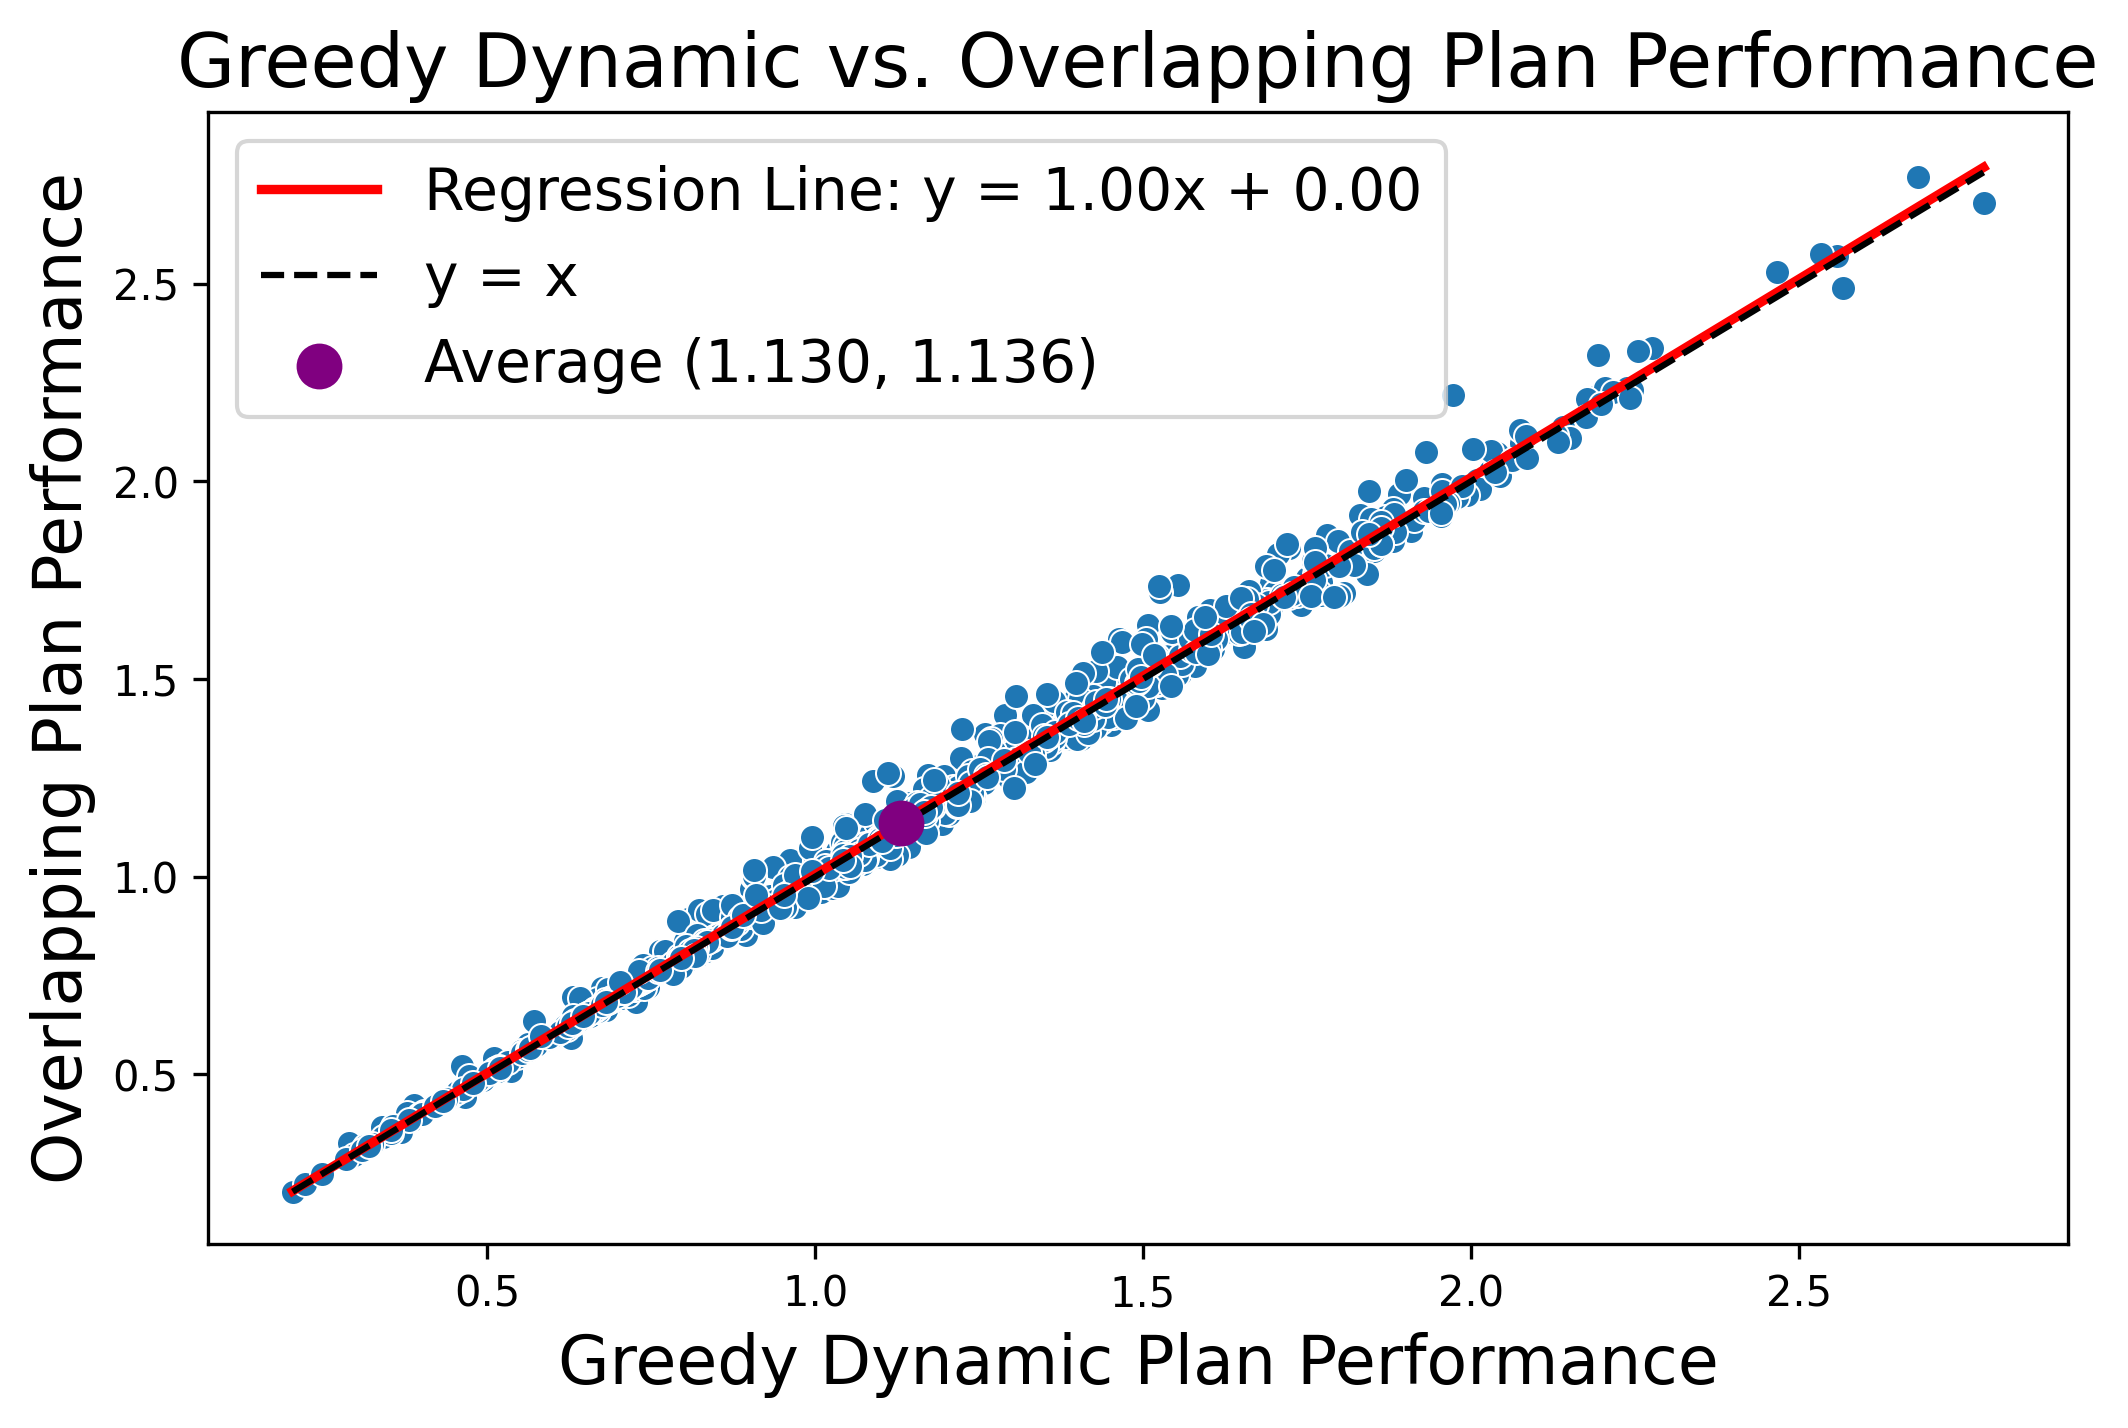

Saved plot as figures/scatterplots/OptimalDynamic_Overlapping_N5_B3_G5.png


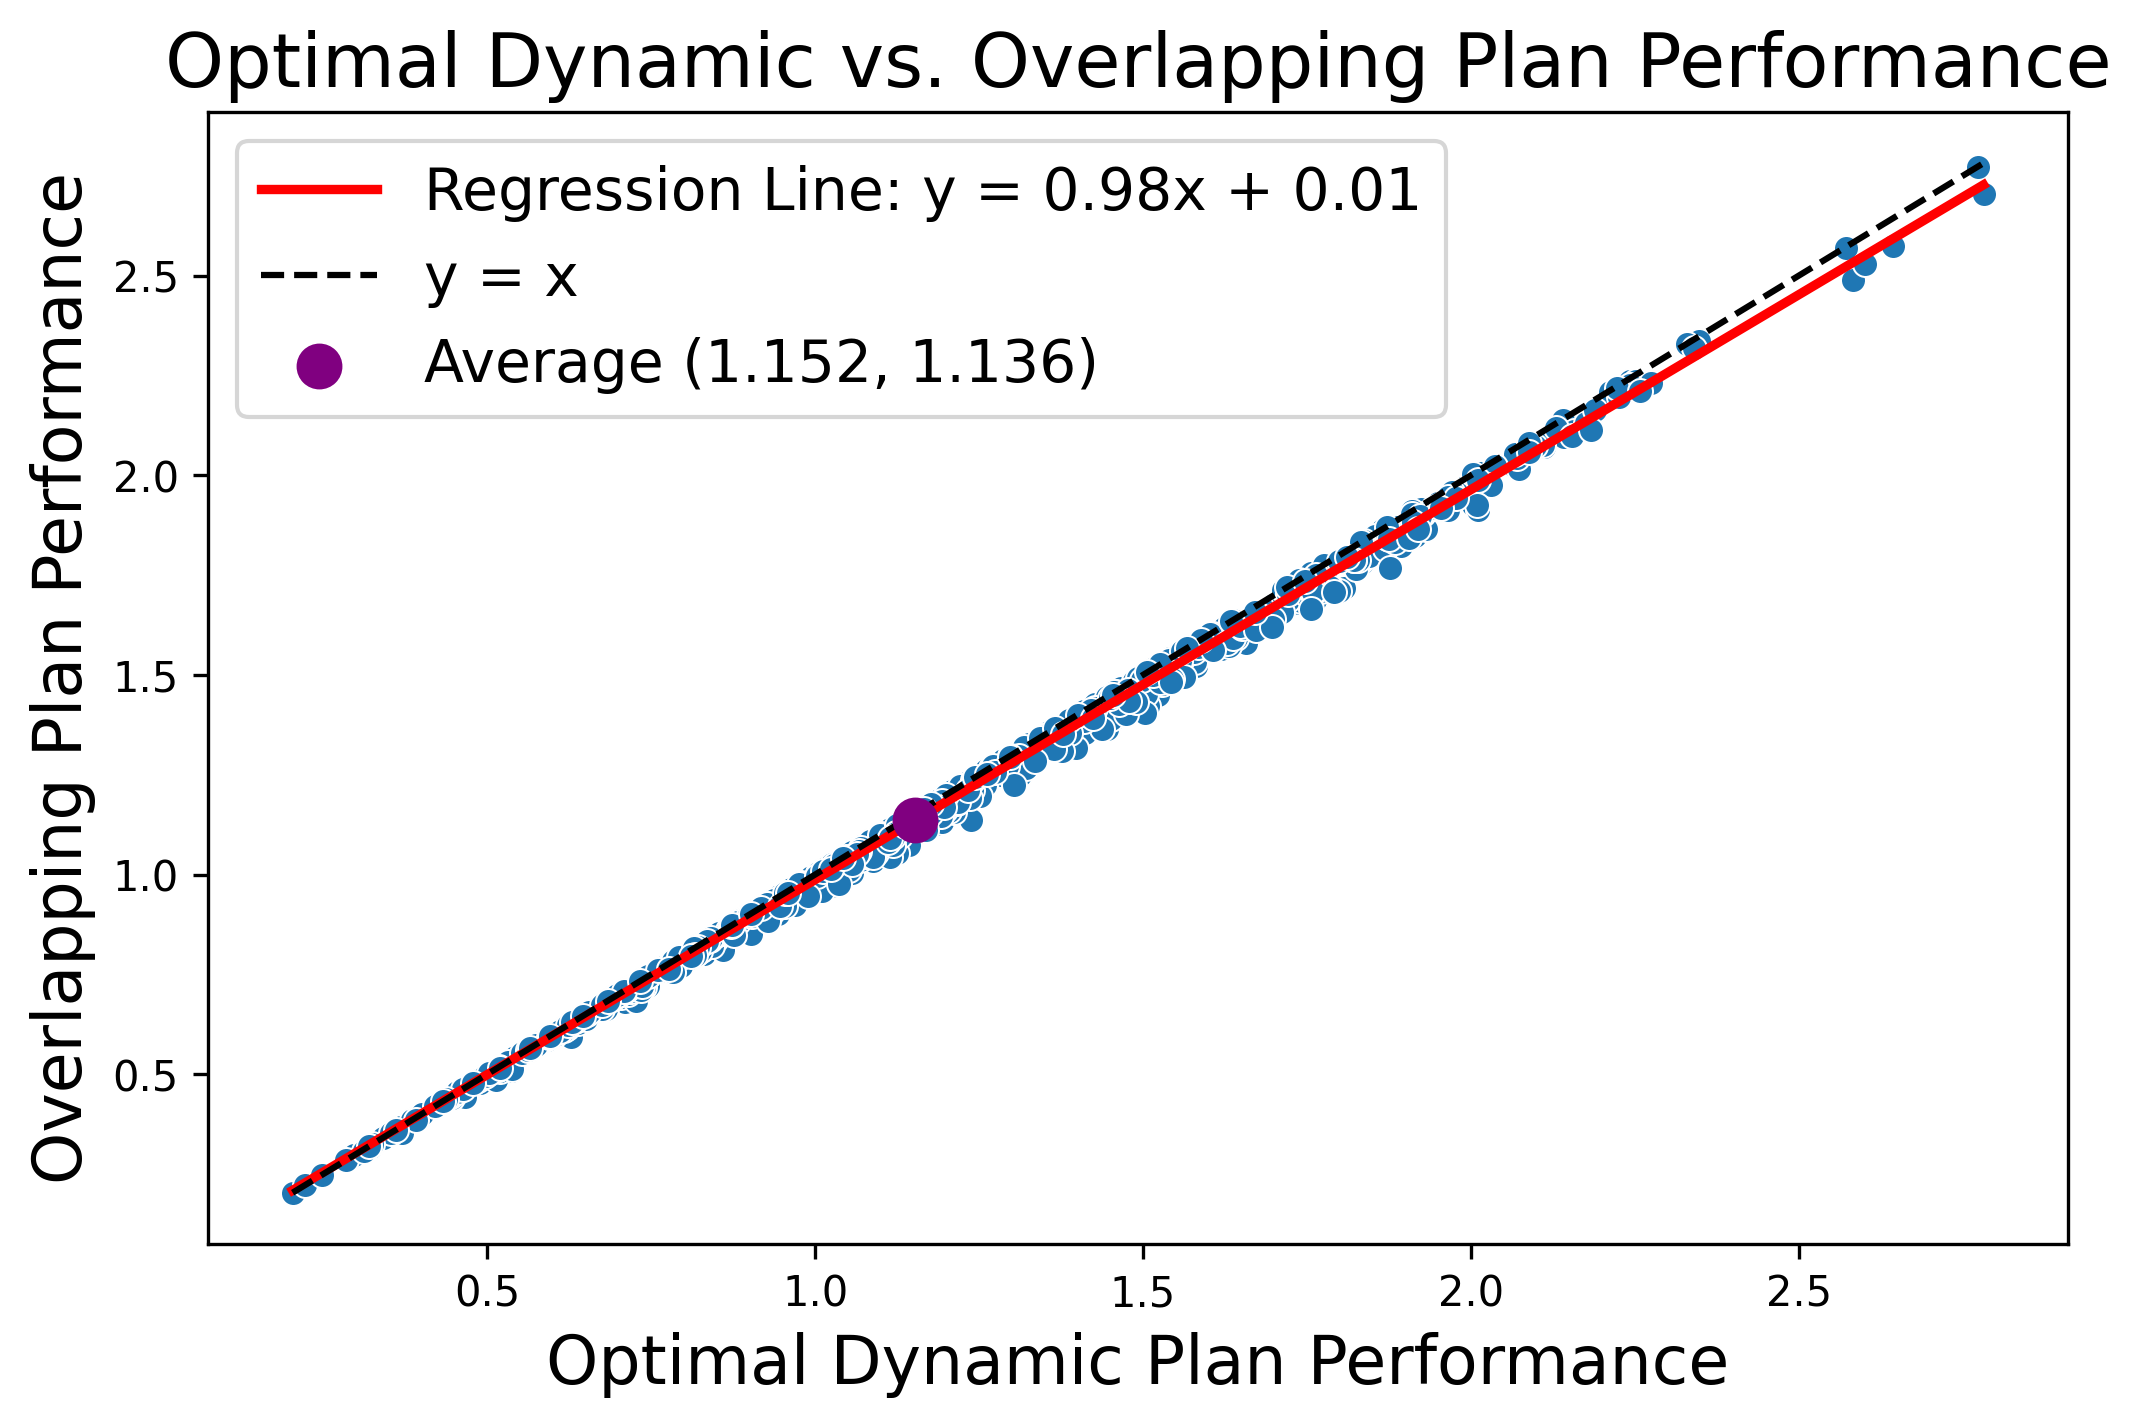

In [25]:
# Example combos to test the plotting function
# combos = [{'N': 50, 'd': 2, 'B': 10, 'G': 5, 'types':True, 'real_world':'_IPICYT_Utils1'}, {'N': 50, 'd': 2, 'B': 5, 'G': 10, 'types':True, 'real_world':'_IPICYT_Utils1'}]
# combos = [{'N': 50, 'd': 2, 'B': 5, 'G': 10, 'types':True}]
# combos = [{'N': 5, 'd': 2, 'B': 3, 'G': 5, 'types':False}]
combos = [{'N': 3, 'd': 2, 'B': 2, 'G': 3, 'types':False}, {'N': 5, 'd': 2, 'B': 3, 'G': 5, 'types':False}]
for combo in combos:
    # plot_results(solveStaticNonOverlap, solveStaticNoPool, combo)
    # plot_results(solveDynamic, solveStaticOverlap, combo)
    # plot_results(solveDynamic, solveGreedyDynamic, combo)
    # plot_results(solveDynamic, maxUtil, combo)
    # plot_results(solveStaticOverlap, solveStaticNonOverlap, combo)
    # plot_results(solveDynamic, solveNN, combo)
    # plot_results(solveStaticNonOverlap, solveNN, combo)
    # plot_results(solveStaticOverlap, solveNN, combo)
    # plot_results_compare(solveGreedyDynamic, solveNN, combo, solveDynamic)
    # plot_results(solveDynamic, solveConicGibbsGreedyDynamic, combo)
    # plot_results(solveStaticNonOverlap, solveConicGibbsGreedyDynamic, combo)
    # plot_results(solveStaticOverlap, solveConicGibbsGreedyDynamic, combo)
    # # plot_results_compare(solveGreedyDynamic, solveRLDynamic, combo, solveDynamic)
    # plot_results(solveNN, solveConicGibbsGreedyDynamic, combo)
    plot_results(combo, "Greedy Dynamic", "Overlapping", x_fontsize=16, y_fontsize=16, title_fontsize=18, legend_fontsize=14, figsize=(8,5), df=df)
    plot_results(combo, "Optimal Dynamic", "Overlapping", x_fontsize=16, y_fontsize=16, title_fontsize=18, legend_fontsize=14, figsize=(8,5), df=df)
    # plot_results(solveConicGibbsGreedyDynamic, solveDynamic, combo)
    # plot_results(solveConicGibbsGreedyDynamic, solveNN, combo)
    # plot_results(solveConicGibbsGreedyDynamic, solveESDynamic, combo)
    # plot_results(solveMILP, solveGreedy, combo)
    # plot_results(solveConicGibbsGreedyDynamic, solveGreedy, combo)
    # plot_results(solveConicGibbsGreedyDynamic, solveMILP, combo)